Shop Customer Data is a detailed analysis of a imaginative shop's ideal customers. It helps a business to better understand its customers. The owner of a shop gets information about Customers through membership cards.

Dataset consists of 2000 records and 8 columns:

Customer ID
Gender
Age
Annual Income
Spending Score - Score assigned by the shop, based on customer behavior and spending nature
Profession
Work Experience - in years
Family Size

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('F:/SHIVAN KUMAR/week 1/customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [5]:
#getting the info about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
CustomerID                2000 non-null int64
Gender                    2000 non-null object
Age                       2000 non-null int64
Annual Income ($)         2000 non-null int64
Spending Score (1-100)    2000 non-null int64
Profession                1965 non-null object
Work Experience           2000 non-null int64
Family Size               2000 non-null int64
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


1. Age of 25% customers is 25, 50% customers age is 48 and 75% customers age is 73 years. Maximum age that data contains is 99.
2. The max annual income of a customer is 189,974 
3. The max family size of a customer is 9
4. All the columns have zero as min value which will lead to wrong predictions

In [7]:
df.shape

(2000, 8)

In [8]:
# name of the columns
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')

In [9]:
#renamed anual income ($) column
df.rename(columns = {'Annual Income ($)':'Annual_Income'}, inplace = True)
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')

In [10]:
# check for null values
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual_Income              0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

All columns do not have any null/ missing value except 'Profession' Column

In [11]:
# checking for unique professions 
df.Profession.unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', nan], dtype=object)

The above output shows the professions that the customers have

In [12]:
df.Profession.mode()

0    Artist
dtype: object

Most of the customers have 'Artist' as the profession

In [1]:
# not working

#out of 2000 rows only 35 are null so drop it 
#df.dropna(how="any", inplace=True)

#fill with mode value
#df["Profession"].fillna("df.Profession.mode(),inplace=True")

df["Profession"].fillna("Artist")
#df["children"].fillna(df.children.mode()[0],inplace= True)

NameError: name 'df' is not defined

I tried to fill 35 rows of missing values instead of dropping it ,with mode value but its giving error

In [29]:
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [31]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [154]:
# Finding male and female count
df['Gender'].value_counts()

Female    1186
Male       814
Name: Gender, dtype: int64

There are more female customers than male. That means more females are visiting the store.

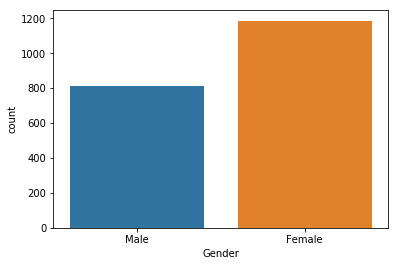

In [153]:
#showing through countplot
sns.countplot(x=df["Gender"])

Above graph shows the count of male and female. It shows that male customers are less than females. 

Text(0, 0.5, '')

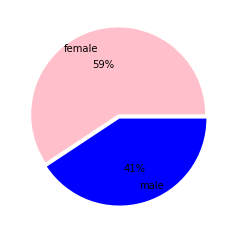

In [170]:
# Check the male, female %
plt.figure(figsize=(4,4))

df.Gender.value_counts().plot(kind="pie",explode=[.05,0], autopct="%1.0f%%",labels=["female","male"],fontsize=10,labeldistance=0.8
 , colors=["Pink","blue"])
plt.ylabel(None)
#plt.title("female & male",fontsize=15 )

Above pie chart shows the percentage of male and female customers in the database

In [94]:
# No of entries Profession wise
df["Profession"].value_counts()

Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Name: Profession, dtype: int64

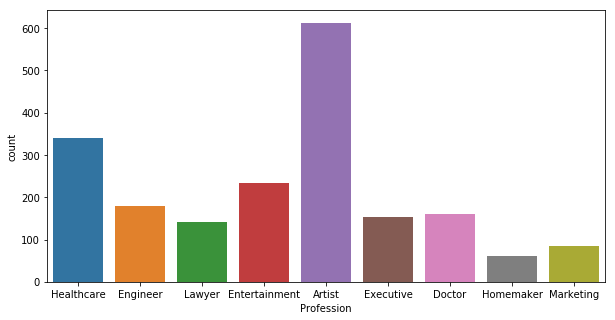

In [161]:
#plt.figure(figsize=(15,10),dpi=200)
plt.figure(figsize=(10,5))
sns.countplot(x=df['Profession'])
#sns.countplot(x='Profession', data=df)

The above graph shows different professions and their count.<br>
It shows more customers are having profession as Artist, followed by Healthcare and entertainment.<br>
Less cutomers are homemakers

In [135]:
# How many male and females in each profession
gp=df.groupby('Profession')['Gender'].value_counts()
gp

Profession     Gender
Artist         Female    380
               Male      232
Doctor         Female     89
               Male       72
Engineer       Female    103
               Male       76
Entertainment  Female    133
               Male      101
Executive      Female     87
               Male       66
Healthcare     Female    196
               Male      143
Homemaker      Female     39
               Male       21
Lawyer         Female     86
               Male       56
Marketing      Female     53
               Male       32
Name: Gender, dtype: int64

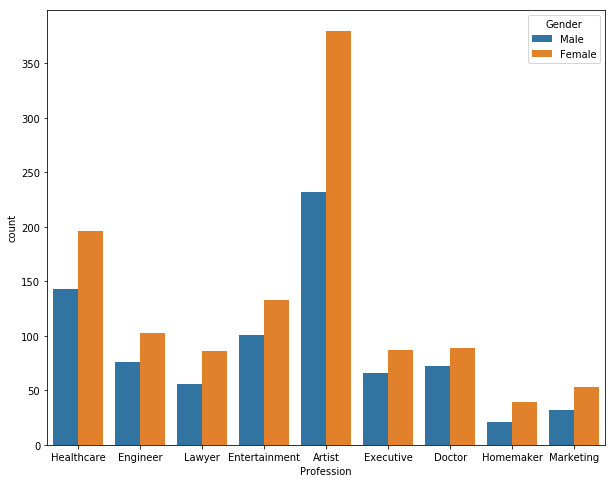

In [165]:
# Number of Male and Females based on their Professions 
plt.figure(figsize=(10,8))
sns.countplot(data = df,x="Profession",hue="Gender")

The above graph shows number of male and females in each profession.

In [62]:
# checking age values
a=df['Age'].unique()
print(sorted(a))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


The age column has values ranging from 0-99.<br> Here age cannot be zero 

In [63]:
print("maximum income for Profession: ")
top_Profession = df.groupby('Profession').agg({"Annual_Income":"max"}).reset_index()
print(top_Profession)


maximum income for Profession: 
      Profession  Annual_Income
0         Artist         189709
1         Doctor         189672
2       Engineer         189974
3  Entertainment         186882
4      Executive         189630
5     Healthcare         189689
6      Homemaker         188696
7         Lawyer         189650
8      Marketing         186069


The above output shows the max income of a customer for particlular profession.<br> Artists are getting paid highly than others

In [68]:
# which profession gives high income
print("Average income for Profession: ")
avg_profession= df.groupby('Profession')['Annual_Income'].mean().reset_index()
print(avg_profession)
#top_profession.sort_values('Annual_Income')#,ascending =True)

Average income for Profession: 
      Profession  Annual_Income
0         Artist  108776.580065
1         Doctor  111573.217391
2       Engineer  111161.240223
3  Entertainment  110650.333333
4      Executive  113770.130719
5     Healthcare  112574.041298
6      Homemaker  108758.616667
7         Lawyer  110995.838028
8      Marketing  107994.211765


The above output shows the average income of a customer for particlular profession.

In [145]:
print("Highest working experience in each Profession: ")
top_wrk_exp = df.groupby('Profession').agg({"Work Experience":"max"})
print(top_wrk_exp)


Highest working experience in each Profession: 
               Work Experience
Profession                    
Artist                      17
Doctor                      16
Engineer                    16
Entertainment               15
Executive                   16
Healthcare                  16
Homemaker                   14
Lawyer                      17
Marketing                   15


The customers who are artists are having more work experience than others while marketting people have less experience.

In [178]:
# average income for male and female
df.groupby("Gender").Annual_Income.mean()

Gender
Female    110553.715008
Male      110991.323096
Name: Annual_Income, dtype: float64

The female customer's average annual income is more than male customers.

In [74]:
# Checking family size count
df['Family Size'].value_counts()

2    361
3    311
1    299
4    289
5    258
6    243
7    234
8      4
9      1
Name: Family Size, dtype: int64

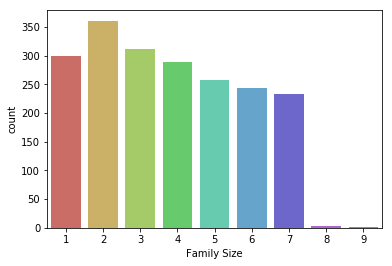

In [72]:
# Checking family size count
sns.countplot(x='Family Size', data=df, palette="hls")

Most of the customers have family of 2. 

In [75]:
print("Highest spending score by family size: ")
fam_exp = df.groupby('Family Size').agg({"Spending Score (1-100)":"max"})
print(fam_exp)

Highest working experience in each Profession: 
             Spending Score (1-100)
Family Size                        
1                               100
2                               100
3                               100
4                               100
5                               100
6                               100
7                                99
8                                99
9                                17


In [78]:
print("Average annual income by family size: ")
fam_incm = df.groupby('Family Size').agg({"Annual_Income":"mean"})
print(fam_incm)

Average annual income by family size: 
             Annual_Income
Family Size               
1            108752.377926
2            104697.354571
3            106412.514469
4            109476.148789
5            114283.461240
6            119060.242798
7            118191.602564
8             78607.750000
9             30000.000000


In [83]:
#checking genderwise family size
t=df.groupby(by=['Family Size'])['Gender'].value_counts()
print(t)

Family Size  Gender
1            Female    177
             Male      122
2            Female    222
             Male      139
3            Female    172
             Male      139
4            Female    177
             Male      112
5            Female    151
             Male      107
6            Female    143
             Male      100
7            Female    141
             Male       93
8            Female      3
             Male        1
9            Male        1
Name: Gender, dtype: int64


The female customers are more in number for each family size group. 